In [1]:
import SAIRD_Feedback as fm
import SIRD_Model
import SAIRD_Model

import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

[ 0.03406082  0.02836     0.02655416 -0.00179191]


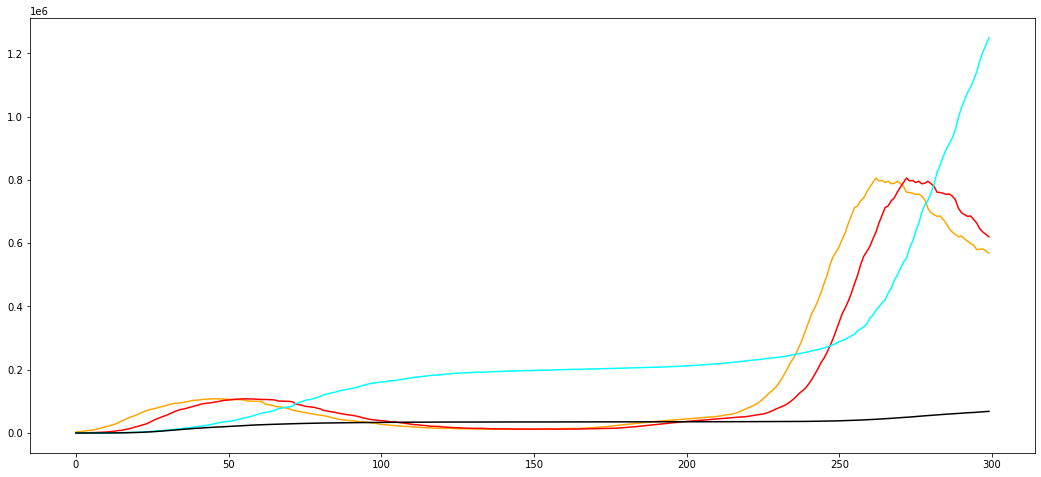

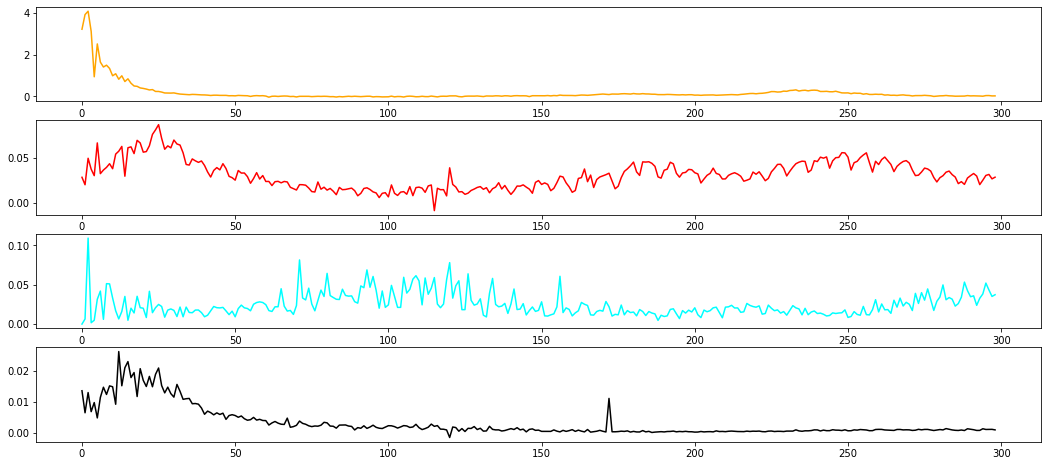

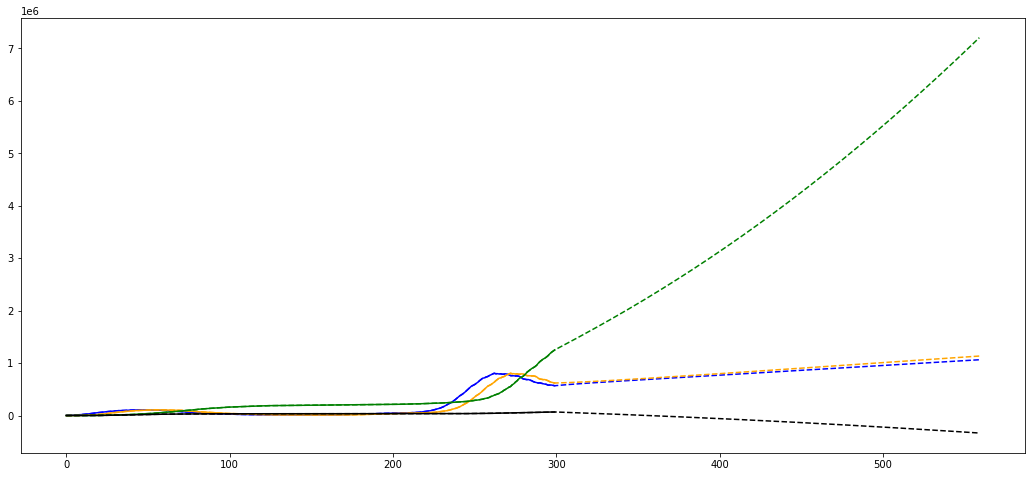

In [9]:
pathc = "../Data/Italian Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)
asymptRaw = fm.calcAsymptomatic(infectRaw, 10)

#set up day range
pop = 60000000
skipDays = 0
numDays = 300 #just to get initial beginning data
daysToPredict = 260
asympt = asymptRaw[skipDays:numDays]
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]

lamda = .000001 #regularization weight
w = 1 #weight decay, when w is 1 there is no decay (all days weighted equal)
q = .09

SAIRD_Model.graphData(asympt, infect, recov, dead)
linTimeVars = SAIRD_Model.getTimeVars(q,pop, asympt, infect, recov, dead, graph=True)
linVars = SAIRD_Model.getLinVars(q,pop, asympt,infect,recov,dead,lamda,w)
print(linVars)
SAIRD_Model.predictFuture(linVars,asympt,infect,recov,dead,q,pop, daysToPredict)

In [ ]:


q = .09
b2 = 700
b3 = 3

nonLinVars = [q,b2,b3]
linVars = fm.getLinVars(nonLinVars, pop, asympt, infect, recov, dead, lamda, w)
#linVars = fm.getLinVars(nonLinVars, pop, asympt[:-daysToPredict], infect[:-daysToPredict], recov[:-daysToPredict], dead[:-daysToPredict], lamda, w)
linVars[0] = 0
linVars[1] = .4
print(linVars)

#predict future time
#constParams = SIRD_Model.calculateConstantParams(infect[:-daysToPredict], recov[:-daysToPredict], dead[:-daysToPredict], pop, q)
#print(constParams)
fm.predictFuture(nonLinVars, linVars, asympt, infect, recov, dead, pop, daysToPredict, graphVals=[1,1,1,1])
#fm.predictMatch(nonLinVars, linVars, asympt, infect, recov, dead, pop, daysToPredict, graphVals=[1,1,1,1])
#SIRD_Model.predictConstMatch(infect, recov, dead, pop, daysToPredict, constParams, q, graphVals=[1,1,0,0])

[2.35120048e-05 6.55230353e-05 1.24306841e-04 4.42837937e-04
 1.20543088e-03 2.51442858e-03 8.54295110e-03 1.34592558e-02
 2.52444843e-02 4.31614690e-02 7.79963806e-02 1.30809983e-01
 2.82372145e-01 5.67549296e-01 1.10901546e+00 1.34435442e+00
 2.58702557e+00 4.61005851e+00 7.28571356e+00 1.21817004e+01
 1.90504057e+01 2.67562373e+01 3.85599145e+01 5.15480710e+01
 7.96406137e+01 1.18210123e+02 1.69362244e+02 2.20969633e+02
 2.79170602e+02 3.43571984e+02 4.14564513e+02 5.19470711e+02
 6.38104422e+02 7.49231830e+02 8.78402374e+02 9.38505440e+02
 1.01926125e+03 1.13937129e+03 1.24771692e+03 1.35613637e+03
 1.49834306e+03 1.65483366e+03 1.76270174e+03 1.81311237e+03
 1.88309368e+03 1.98050017e+03 2.06735702e+03 2.19590168e+03
 2.32884732e+03 2.42322259e+03 2.47088957e+03 2.55186184e+03
 2.63918605e+03 2.66563932e+03 2.72658210e+03 2.76363576e+03
 2.76210434e+03 2.72187904e+03 2.72112099e+03 2.65712529e+03
 2.63324902e+03 2.58314331e+03 2.60193133e+03 2.58065485e+03
 2.53642475e+03 2.496995

(0.0, 500.0)

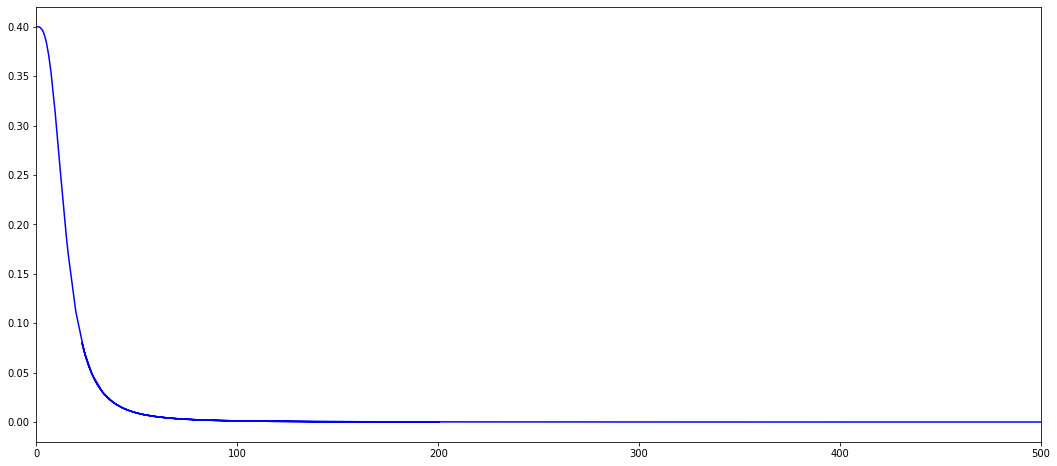

In [6]:
#graph feedback clope
#print((nonLinVars[-2]*infect[:-1]/(q*pop))**nonLinVars[-1])
#print((linVars[1] / (1 + (nonLinVars[-2]*infect[:-1]/(q*pop))**nonLinVars[-1])))

infectScaled = 10000*(infect[:-1]/(q*pop)) #x axis, infections per 10000
betaY = linVars[0] + (linVars[1] / (1 + (nonLinVars[-2]*infect[:-1]/(q*pop))**nonLinVars[-1]))

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(infectScaled, betaY, color='blue', label='beta by infections') #per 10,000
ax.set_xlim([0,500])

[0.057646362555374586, 0.031968153652521876, 0.000983367504777999]


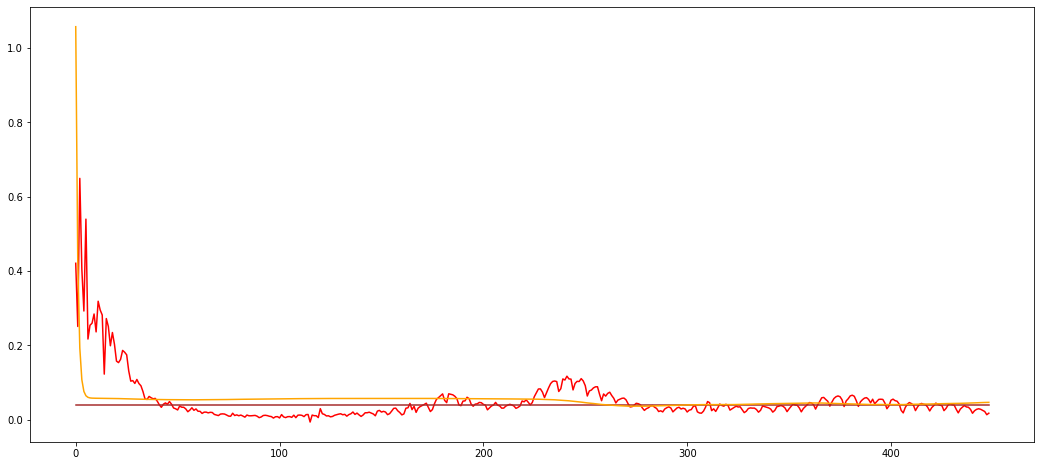

In [3]:
pathc = "../Data/Italian Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

#set up day range
pop = 60000000
skipDays = 0
numDays = len(infectRaw) #max days
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]

#set up constraints
#boundQ =     (.09,  .09) #q should be between 0 and 1
#boundAlpha = (0,   1.00)
#boundC =     (0,      0)
#boundB1 =    (0,     10)
#boundB2 =    (1,      4)

lamda = 10 #regularization weight
wVal = 1 #weight decay, when w is 1 there is no decay (all days weighted equal)

#q = .09
#alpha = .1
#C = 0
#b1 = 10
#b2 = 2

nonLinVars = [q,alpha,C,b1,b2]
linVars = fm.getLinVarsSIRD(nonLinVars, pop, infect, recov, dead, lamda, w)

print(linVars)


betaConst = SIRD_Model.calculateConstantParams(infect, recov, dead, pop, q)[0]
betaConstGraph = np.ones((len(infect)-1))*betaConst #fill array with const value

fig2, ax2 = plt.subplots(figsize=(18,8))
ax2.plot(SIRD_Model.calculateAverageParams(infect, recov, dead, pop, q, graph=False)[:,0], color="red") #time varying beta
ax2.plot(betaConstGraph, color="brown") #constant beta
ax2.plot(fm.calculateBeta(nonLinVars, linVars, pop, infect), color="orange") #feedback beta